In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
oliv = datasets.fetch_olivetti_faces()  #This will download the image dataset for us.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\DELL\scikit_learn_data


In [6]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [7]:
oliv['images'].shape  #(400, 64, 64) means we have 400 images of size 64 * 64

(400, 64, 64)

In [8]:
oliv['data'].shape    #(400, 4096) means 64X64 = 4096 ssingle array.                              

(400, 4096)

# Plotting the images

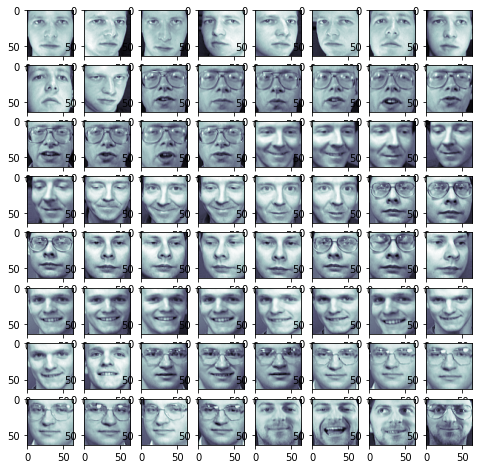

In [9]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)
    
plt.show()

In [10]:
X = oliv.data
y = oliv.target

In [11]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.components_.shape  #means 400 images are the components where each component is composed of 4096 values.

(400, 4096)

# Figuring out the no of features to be kept

In [17]:
k = 0
total = sum(pca.explained_variance_)
current_var = 0
while current_var/total < 0.95:
    current_var += pca.explained_variance_[k]
    k = k + 1
    
k

123

# Create a PCA object with n_components = k

In [21]:
pca = PCA(n_components = k, whiten = True)
transformed = pca.fit_transform(X)
transformed.shape

(400, 123)

# Reproducing the images back to find the amount of info loss while reducing the features

In [22]:
x_approx  = pca.inverse_transform(transformed)
x_approx.shape

(400, 4096)

In [24]:
#Reshaping the images to 64*64 data
x_approx_images = x_approx.reshape((400, 64, 64))

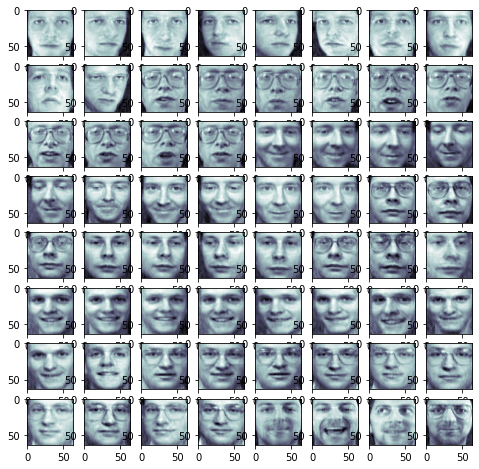

In [25]:
fig = plt.figure(figsize = (8, 8)) 
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
    
plt.show()  
#These images are similar to the original images...So the info loss is very less when we reduce the features from 4096 to 123 by maintaining a variance of 95%.

# Looking at the eigen faces

In [26]:
eigen_vec = pca.components_
eigen_vec.shape

(123, 4096)

In [27]:
#Reshaping these faces - These faces are representing the different aspects of the images and the faces.
eigen_faces = eigen_vec.reshape((123, 64, 64))

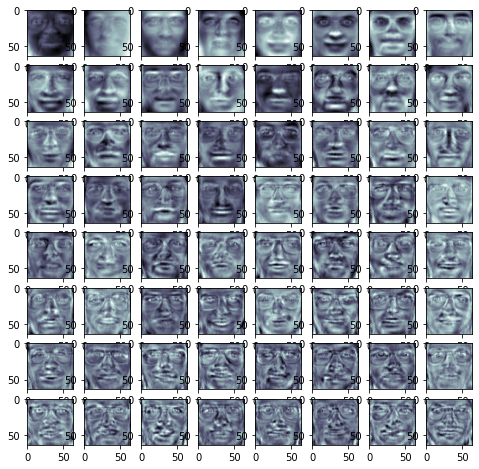

In [28]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigen_faces[i], cmap = plt.cm.bone)
    
plt.show()